<a href="https://colab.research.google.com/github/JonasSouza871/Machine-Learning-Statistics-Studies/blob/main/Machine-Learning-Statistics-Studies%20/Regression/Tipos_de_Regress%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Modelo Regressão Linear

------------

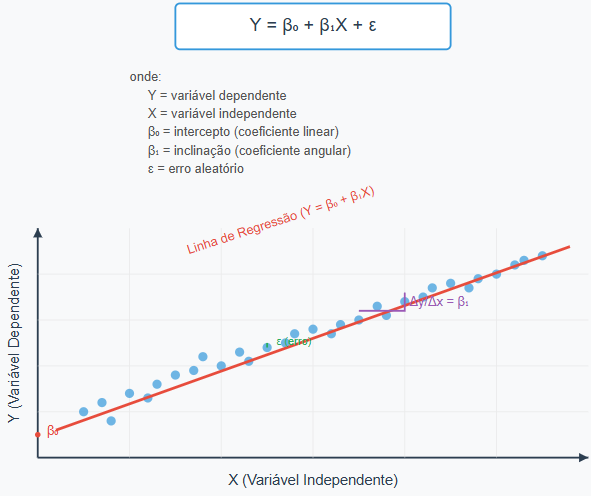

- Relação linear entre variáveis: Assume que a mudança em Y é proporcional à mudança em X, criando uma linha reta quando plotada em um gráfico
- Minimização de erros por mínimos quadrados: Encontra a melhor reta ajustando os coeficientes para minimizar a soma dos quadrados das distâncias verticais entre os pontos observados e a linha predita

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Pré processamento de dados:

In [ ]:
dados = pd.read_csv('Dataset_temperatura_umidade.csv') #dados coletados atraves do dataseet no kaggle para temperatura e umidade
#link: https://www.kaggle.com/datasets/jonassouza872/temperature-vitria-da-conquista-08-25-to-08-29/code
#feito pelo proprio autor
dados

,Timestamp,Temp_AHT20_C,Umid_AHT20_pct
0,2025-08-25 22:11:31,22.85,69.97
1,2025-08-25 22:11:37,22.82,69.05
2,2025-08-25 22:11:43,22.82,68.84
3,2025-08-25 22:11:49,22.85,69.00
4,2025-08-25 22:11:55,22.83,68.89
...,...,...,...
51100,2025-08-29 11:46:43,24.01,58.70
51101,2025-08-29 11:46:49,24.00,58.69
51102,2025-08-29 11:46:55,23.93,56.39
51103,2025-08-29 11:47:01,23.94,56.71


In [ ]:
df = pd.DataFrame(dados) #Transforma em dataframe
df

,Timestamp,Temp_AHT20_C,Umid_AHT20_pct
0,2025-08-25 22:11:31,22.85,69.97
1,2025-08-25 22:11:37,22.82,69.05
2,2025-08-25 22:11:43,22.82,68.84
3,2025-08-25 22:11:49,22.85,69.00
4,2025-08-25 22:11:55,22.83,68.89
...,...,...,...
51100,2025-08-29 11:46:43,24.01,58.70
51101,2025-08-29 11:46:49,24.00,58.69
51102,2025-08-29 11:46:55,23.93,56.39
51103,2025-08-29 11:47:01,23.94,56.71


In [ ]:
df['Temp_AHT20_C'].describe()

,Temp_AHT20_C
count,51105.000000
mean,20.034183
std,2.816140
min,15.080000
25%,17.520000
50%,19.280000
75%,22.510000
max,25.940000


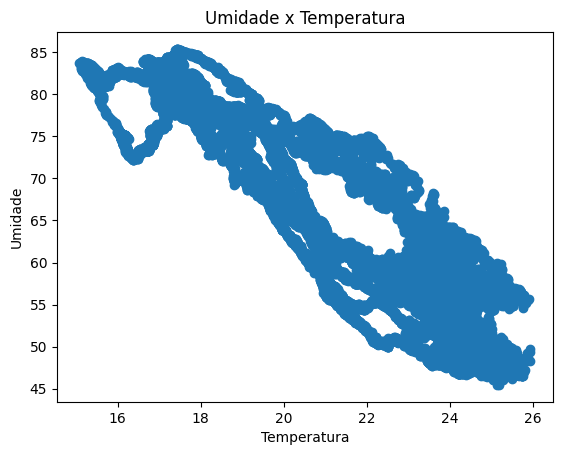

In [ ]:
plt.scatter(df['Temp_AHT20_C'], df['Umid_AHT20_pct']) #plota temperatura e umidade
plt.title('Umidade x Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.show()

-  como são varios dados de temperatura >50000 por isso que fica estranho os dados.

In [ ]:
import statsmodels.formula.api as smf #biblioteca para usar os modelos de regressao
import statsmodels.stats.api as sms

regressao = smf.ols(formula = 'Umid_AHT20_pct ~ Temp_AHT20_C', data = df).fit()
#variavel Umidade sendo Y e temperatura sendo x
# y = ax
# mostrando que a umidade é dependente da temperatura
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:         Umid_AHT20_pct   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 2.667e+05
Date:                Sat, 27 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:44:30   Log-Likelihood:            -1.4956e+05
No. Observations:               51105   AIC:                         2.991e+05
Df Residuals:                   51103   BIC:                         2.991e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      143.3316      0.144    998.691   

In [ ]:
regressao.params

,0
Intercept,143.331585
Temp_AHT20_C,-3.663688


- Interceptor considerando que em 0 graus a umidade esperada é de 143%, o que nao faz sentido logico visto que o maximo é 100%. Mostrando assim que o mdoelo so funciona na faixa esperada.

f(x) = ax +b

f(x) = -3.66*x +143.33

In [ ]:
x = 18 # temperatura de 18 graus.
y = -3.66*x +143.33
print(y) # 77% de umidade previsto

77.45000000000002


- tambem temos o valor de r^2 de 0.839 temos que a temperatura explica 83,9% dos dados de umidade

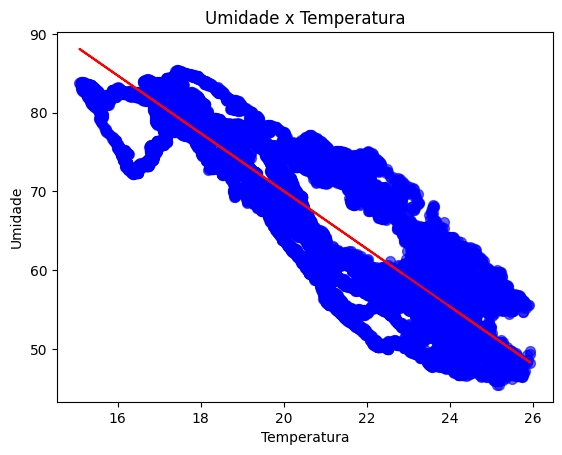

In [ ]:
plt.scatter(df['Temp_AHT20_C'], df['Umid_AHT20_pct'], s = 50, color= 'blue', alpha = 0.6)
plt.plot(df['Temp_AHT20_C'], regressao.fittedvalues, color = 'red')
plt.title('Umidade x Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.show()

- por mais que o modelo tenha representado bom valores de r^2 ainda sim ficou mio estranho o fato de se a temperatura der igual a 0 a umidade ser 143% o que não é possivel.

- As melhores predições do modelo será na faixa que foi exposto (entre 16°c e 26°c)

# 2. Regressão Polinomial
----------------

## 2.1.  Regressão Polinomial de 2° Grau

---------------------

- Captura relações curvilíneas: Modela padrões em forma de U ou U invertido, útil quando o efeito de X sobre Y acelera ou desacelera conforme X aumenta
- Termo quadrático adicional: Inclui X² na equação, permitindo que o modelo identifique pontos de máximo ou mínimo (vértice da parábola) nos dados

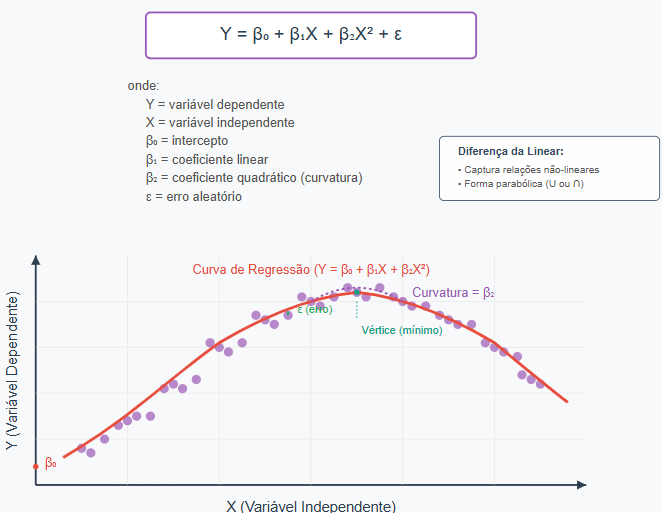

f(x) = b2x^2 + b1*x + b0

In [ ]:
coeficientes = np.polyfit(df['Temp_AHT20_C'], df['Umid_AHT20_pct'], 1)  # treina funções polinomias com base no ultimos parametro
# veja que eu defini 1 no final, o que indica que o modleo será treinado como  regressão linear
modelo_linear = np.poly1d(coeficientes) #calcula os coeficientes do modelo
modelo_linearwwwwwwww#os valores batem com o que foi achado acima

poly1d([ -3.66368759, 143.33158509])

- Aplicando agora a regressão quadrático

In [ ]:
coeficientes_quadraticos = np.polyfit(df['Temp_AHT20_C'],df['Umid_AHT20_pct'],2) #treina com base na função quadratica
modelo_quadratico = np.poly1d(coeficientes_quadraticos) # calcula os coeficientes do modelo
modelo_quadratico

poly1d([-7.37127879e-02, -6.18756256e-01,  1.12499442e+02])

In [ ]:
y_pred = modelo_quadrático(df['Temp_AHT20_C'])
y_pred #Valores da regressão (valores previsto de umidade) com base nas temperaturas do sensor

array([59.87375666, 59.99331323, 59.99331323, ..., 55.48135294,
       55.43987907, 55.35688709])

In [ ]:
# Acessa os coeficientes (c) do objeto poly1d
a = modelo_quadratico.coef[0]
b = modelo_quadratico.coef[1]
c = modelo_quadratico.coef[2]

# Cria um print formatado para mostrar a equação (y = ax^2 + bx + c)
print(f"Equação de Regressão Quadrática:")
print(f"Umid_AHT20_pct = ({a:.4f}) * Temp_AHT20_C^2 + ({b:.4f}) * Temp_AHT20_C + ({c:.4f})")

Equação de Regressão Quadrática:
Umid_AHT20_pct = (-0.0737) * Temp_AHT20_C^2 + (-0.6188) * Temp_AHT20_C + (112.4994)


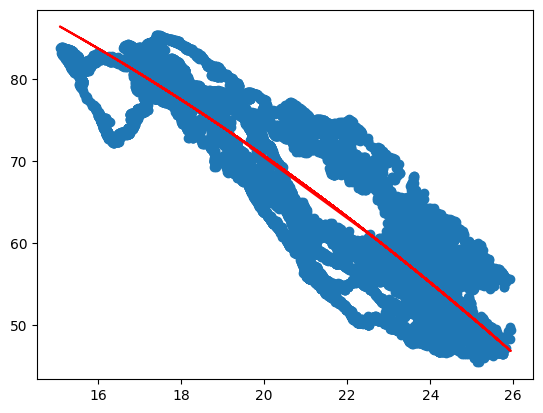

In [ ]:
plt.scatter(df['Temp_AHT20_C'],df['Umid_AHT20_pct'])
plt.plot(df['Temp_AHT20_C'],y_pred, color='red')

-  vemos o modelo quadrático bem parecido com o modelo linear

- Para achar o r^2 nesse caso:

In [ ]:
# Fazer as predições com o modelo
y_pred = modelo_quadratico(df['Temp_AHT20_C']) #umidade que ele previu com base na temperatura
y_real = df['Umid_AHT20_pct'] #umidade real do dataset

ss_res = np.sum((y_real - y_pred) ** 2)  # Soma dos quadrados dos resíduos
ss_tot = np.sum((y_real - np.mean(y_real)) ** 2)  # Soma total dos quadrados
r2 = 1 - (ss_res / ss_tot)

print(f"R² = {r2:.4f}")

R² = 0.8411


-  vemos que para esse modelo a temperatura explica 84% dos dados de umidade, logo temos uma breve melhora se comparado com o modelo linear (83%)3

In [ ]:
333333333333333333

## 2.2.  Regressão Polinomial de 3° Grau

---------------

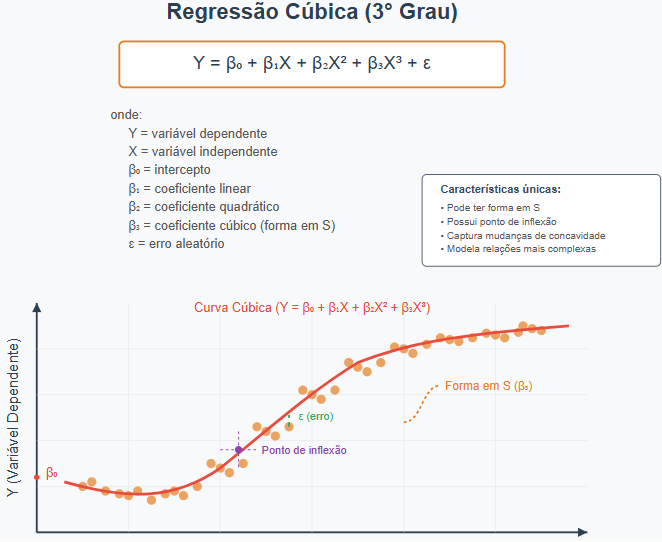

In [ ]:
coeficientes_cubico = np.polyfit(df['Temp_AHT20_C'],df['Umid_AHT20_pct'], 3) # definicao e trieno do modelo como 3° grau
modelo_cubico = np.poly1d(coeficientes_cubico) #calcula os coeficientes
modelo_cubico

poly1d([ 7.74598744e-02, -4.85126446e+00,  9.65287378e+01, -5.38868223e+02])

In [ ]:
a, b, c, d = coeficientes_cubico #pega os valores de a,b,c e d com base na equação de 3°
print(f"Y = {a:.4f}X³ + {b:.4f}X² + {c:.4f}X + {d:.4f}") #plota no formato

Y = 0.0775X³ + -4.8513X² + 96.5287X + -538.8682


In [ ]:
Umidade_prevista = modelo_cubico(df['Temp_AHT20_C']) #previsao de umidade com base nos dados de temperatura
Umidade_prevista

array([57.9940685 , 58.10978171, 58.10978171, ..., 54.47567633,
       54.44992964, 54.39886385])

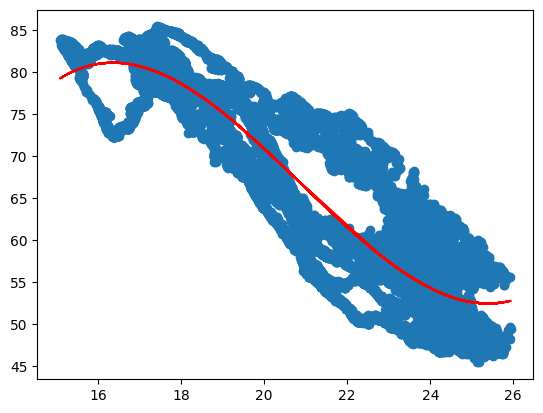

In [ ]:
plt.scatter(df['Temp_AHT20_C'],df['Umid_AHT20_pct']) #plota os pontos reais
plt.plot(df['Temp_AHT20_C'], Umidade_prevista ,color='red') #plota a curva prevista

In [ ]:
umidade_prevista = modelo_cubico(df['Temp_AHT20_C']) #previsao de umidade com base nos dados de temperatura
umidade_real = df['Umid_AHT20_pct'] #pega os dados reais

ss_res = np.sum((umidade_real - umidade_prevista)**2) #soma dos quadrados dos resíduos
ss_tot = np.sum((umidade_real - np.mean(umidade_real))**2) #soma dos quadrados total

r2_cubico = 1 - (ss_res/ss_tot)
r2_cubico

np.float64(0.8565039096569586)

- Vemos novamente uma boa melhoria com a aplicação da regressão de 3° grau.

## 2.3. Exercicio :  Regressão polinomial do 5° grau

------------

In [ ]:
coeficientes_exercicio = np.polyfit(df['Temp_AHT20_C'],df['Umid_AHT20_pct'],5 )
modelo_exercicio = np.poly1d(coeficientes_exercicio) #calcula os coeficientes
modelo_exercicio

poly1d([-6.13802050e-03,  6.17696454e-01, -2.45980968e+01,  4.84228992e+02,
       -4.71301923e+03,  1.82343620e+04])

In [ ]:
a, b, c, d,e,f = coeficientes_exercicio #pega os valores de a,b,c e d com base na equação de 3°
print(f"Y = {a:.4f}X5 + {b:.4f}X4 + {c:.4f}X3 + {d:.4f}X2 + {e:.4f}X1 +  {f:.4f} ") #plota no formato

Y = -0.0061X5 + 0.6177X4 + -24.5981X3 + 484.2290X2 + -4713.0192X1 +  18234.3620 


In [ ]:
Umidade_prevista = modelo_exercicio(df['Temp_AHT20_C']) #previsao de umidade com base nos dados de temperatura
Umidade_prevista

array([57.71251599, 57.77904035, 57.77904035, ..., 55.93124307,
       55.91558303, 55.8839713 ])

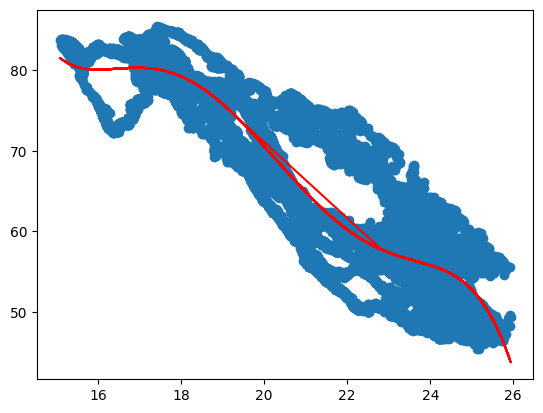

In [ ]:
plt.scatter(df['Temp_AHT20_C'],df['Umid_AHT20_pct']) #plota os pontos reais
plt.plot(df['Temp_AHT20_C'], Umidade_prevista ,color='red') #plota a curva prevista

In [ ]:
umidade_prevista = modelo_exercicio(df['Temp_AHT20_C']) #previsao de umidade com base nos dados de temperatura
umidade_real = df['Umid_AHT20_pct'] #pega os dados reais

ss_res = np.sum((umidade_real - umidade_prevista)**2) #soma dos quadrados dos resíduos
ss_tot = np.sum((umidade_real - np.mean(umidade_real))**2) #soma dos quadrados total

r2_cubico = 1 - (ss_res/ss_tot)
r2_cubico

np.float64(0.8640002474052745)

- leve melhora no r^2